# Proyecto: Turismo de los Alpes


Juan Andrés Jaramillo 201821305<br>
Nicole Murillo Fonseca 202025521<br>
Daniel Santiago Rappy 201921144
<br>
<br>

## Contexto

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar, Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están interesados en analizar las características de sitios turísticos que los hacen atractivos para turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual manera, quieren comparar las características de dichos sitios, con aquellos que han obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a ellos. Adicionalmente, **quieren tener un mecanismo para determinar la calificación que tendrá un sitio por parte de los turistas** y así, por ejemplo, aplicar estrategias para identificar oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el turismo.
<br>
<br>
Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos. Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos actores quieren lograr un análisis independiente de los conjuntos de datos y al final del proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que acompañarán el desarrollo real de este proyecto.
<br>


<br>

Este cuaderno corresponde al desarrollo para la **Etapa 1. Construcción de modelos de analítica de textos:**

# Entendimiento del negocio y enfoque analítico

## Objetivos del negocio:

* Analizar las características de sitios turísticos que los hacen atractivos para los turistas.
* Comparar las características de dichos sitios, con aquellos que han obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a ellos.
* Desarrollar un modelo analítico que permita predecir y calificar automáticamente nuevas reseñas de sitios turísticos, con una alta precisión y sensibilidad.

## Criterios de éxito

-	Precisión del modelo: El modelo analítico debe precisar más de 0.5 en la calificación automática de nuevas reseñas de sitios turísticos, asegurando que las predicciones sean moderadamente consistentes con las evaluaciones de los turistas.

-	Sensibilidad (recall): Es fundamental que el modelo tenga una alta sensibilidad, lo que implica que pueda identificar de manera efectiva las reseñas que reflejan una experiencia positiva o negativa en los sitios turísticos. Esto garantizará una evaluación completa y sensible de la calidad de los destinos turísticos.

-	Adopción y utilidad del modelo: El modelo desarrollado debe poder ser adoptado y utilizado por los diferentes actores de interés, demostrando su utilidad y relevancia para la toma de decisiones y la implementación de estrategias de mejora en el sector turismo.

## Descripción del enfoque analítico para alcanzar los objetivos del negocio

Para alcanzar los objetivos del negocio, se seguirá un enfoque analítico que involucra la aplicación de metodologías de análisis de textos. Esto implica la extracción y procesamiento de información relevante de las reseñas de los sitios turísticos, así como la identificación de patrones y características que influyen en las calificaciones de los turistas. En el marco de nuestro proyecto, hemos empleado una variedad de técnicas de procesamiento de lenguaje natural (NLP, por sus siglas en inglés) y modelos de aprendizaje automático para la construcción de un sistema de calificación automática de reseñas de sitios turísticos.

## Contacto con experto externo al proyecto y detalles de la planeación

Para validar nuestro enfoque y los impactos esperados del proyecto, nos reuniremos con un grupo de estudiantes del curso de estadística 1, quienes actuarán como representantes del sector turismo. Ellos proporcionarán retroalimentación sobre la relevancia y efectividad del modelo analítico propuesto. Esta interacción nos permitirá comprender los impactos esperados del proyecto y seleccionar la formalidad más adecuada para presentar los resultados. La primera reunión está programada para el **11 de abril a través de Zoom**, donde presentaremos los resultados de la etapa 1 y discutiremos el inicio del trabajo para la etapa 2.

## Mapa de actores relacionado con el producto de datos creado

| Rol                                                       | Tipo actor    | Beneficio                                                                                             | Riesgo                                                                                     |
|-----------------------------------------------------------|---------------|-------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|
| Ministerio de Comercio, Industria y Turismo de Colombia  | Financiador   | Mejora del turismo en Colombia, fortaleciendo la economía y la imagen del país como destino turístico.| Riesgo de inversión si el modelo no funciona adecuadamente.                             |
| Asociaciones Hoteleras                                   | Usuario-cliente | Identificación de oportunidades de mejora en servicios turísticos.                                     | Implementación ineficaz si el modelo no es preciso.                                     |
| Cadenas Hoteleras                                        | Usuario-cliente | Mejora en la gestión de la calidad de servicios y toma de decisiones estratégicas.                     | Falta de mejoras significativas en la competitividad si el modelo no refleja preferencias. |
| Usuarios/Turistas                                        | Beneficiado   | Acceso a información precisa y confiable sobre destinos turísticos.                                     | Decisiones basadas en calificaciones incorrectas si el modelo no es preciso.             |
| Ingenieros de Datos                                      | Proveedor     | Garantiza calidad del modelo mediante pruebas y validación exhaustivas.                                 | Dificultades en implementación y mantenimiento si el modelo no está bien organizado.     |
| Científicos de Datos                                     | Proveedor     | Garantiza confiabilidad del modelo mediante proceso replicable y de calidad.                            | Selección inadecuada de técnicas si se subestima la complejidad del problema.             |
| Ingeniero de Software                                    | Proveedor     | Diseño y desarrollo de aplicación web/móvil intuitiva y eficiente.                                      | Fallas en la aplicación que afecten experiencia del usuario o precisión de resultados.    |


# Carga de librerias y dependencias

In [ ]:
# Carga de dependencias

!pip install ydata-profiling # Solo es necesario ejecutarlo para la etapa de perfilamiento de los datos.
!python -m spacy download es_core_news_sm # Solo es necesario para el modelo 2, en el proceso de tokenizacion y lemmatizacion.

# Para ejecutar solo estas tres lineas, las seleccionan y las corren así: ctrl/cmd + shift + Enter
!pip install unidecode
# Estas 2 van a pedir que reinicien la sesion: Runtime -> Restart Session:
!pip install --upgrade spacy
!pip install -U scikit-learn

In [ ]:
# Carga de librerias

import nltk
import pandas as pd
import numpy as np
import spacy
import sys

from ydata_profiling import ProfileReport
from unidecode import unidecode
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.extmath import density
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

from gensim.models import TfidfModel
from gensim.corpora import Dictionary

from time import time

import matplotlib.pyplot as plt

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words("spanish"))
stopwords_list = list(stopwords) # Convierte el set de stopwords a una lista para poder ser pasado como parametro a TfidfVectorizer

snow_stemmer = SnowballStemmer(language="spanish")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Entendimiento y preparación de los datos

## Entendimiento de los datos

In [ ]:
# Carga de datos
df_train = pd.read_csv("/content/tipo2_entrenamiento_estudiantes.csv", sep=',', encoding = 'utf-8')
df_test = pd.read_csv("/content/particion_prueba_estudiantes.csv", sep=',', encoding = 'utf-8')

In [ ]:
revs = df_train.copy()

### Conjunto de entrenamiento

In [ ]:
print("Dimensiones Originales Conjunto de Entrenamiento:",revs.shape,"\n")
print("Vista de los datos:")
revs.head()

Dimensiones Originales Conjunto de Entrenamiento: (7875, 2) 

Vista de los datos:


,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3


In [ ]:
revs['Conteo'] = [len(x) for x in revs['Review']] # longitud de cada review en caracteres.
revs['Moda'] = revs['Review'].apply(lambda x: len(x.split(' '))).mode()[0] # Calcula la moda del número de palabras en las reseñas
revs['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in revs['Review']] # Número máximo de caracteres en una palabra en cada reseña.
revs['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in revs['Review']] # Número mínimo de caracteres en una palabra en cada reseña.

profile = ProfileReport(revs, title="Pandas Profiling Report Conjunto Entrenamiento")
profile.to_file("perfil_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

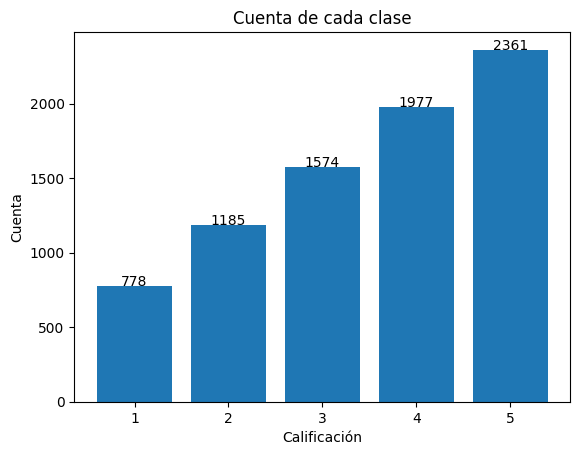

In [ ]:
class_counts = revs['Class'].value_counts().sort_values()

plt.bar(class_counts.index, class_counts.values)

for i, count in enumerate(class_counts.values):
    plt.text(i+1, count + 0.5, str(count), ha='center')


plt.xlabel('Calificación')
plt.ylabel('Cuenta')
plt.title('Cuenta de cada clase')

plt.show()

### Conjunto de prueba

In [ ]:
revs_prueba = df_test.copy()
print("Dimensiones Originales Conjunto de Prueba:",revs_prueba.shape,"\n")
print("Vista de los datos:")
revs_prueba.head()

Dimensiones Originales Conjunto de Prueba: (1750, 1) 

Vista de los datos:


,Review
0,La primera noche nos encontramos en la habitac...
1,A una calle de catedral con platillos tradicio...
2,Porciones muy miserables\nAgua con sabor a clo...
3,Cartagena encanta. De todas las ciudades colon...
4,Ibamos con mucha ilusion de disfrutar el espec...


In [ ]:
revs_prueba['Conteo'] = [len(x) for x in revs_prueba['Review']] # longitud de cada review en caracteres.
revs_prueba['Moda'] = revs_prueba['Review'].apply(lambda x: len(x.split(' '))).mode()[0] # Calcula la moda del número de palabras en las reseñas
revs_prueba['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in revs_prueba['Review']] # Número máximo de caracteres en una palabra en cada reseña.
revs_prueba['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in revs_prueba['Review']] # Número mínimo de caracteres en una palabra en cada reseña.

profile = ProfileReport(revs_prueba, title="Pandas Profiling Report Conjunto Prueba")
profile.to_file("perfil_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Observaciones:

De esta primera etapa de perfilamiento se observa lo siguiente:
En primer lugar, que los datos provistos constan de 2 columnas, la primera contiene las reseñas otorgadas por los usuarios en los respectivos sitios turísticos y la segunda tiene las calificaciones dadas por el turista (como un valor numérico entre 1 y 5) según el sentimiento que tuvo al visitar el sitio. También se observa que la base de datos proporcionada cuenta con 7875 registros, y que no se tienen valores nulos/faltantes.
En segundo lugar, y en linea con lo anterior, observamos que no se tienen problemas graves de calidad de datos puesto que:
<br><br>
* Los datos están completos.
* Se tiene un bajo número de registros duplicados (29/7875) ~ 0.37% del total, que pueden corresponder a visitas en las que turistas que llegaron en grupo al sitio decidieron poner todos el mismo review y la misma calificación. En cualquier caso, el porcentaje es insignificante en relación con el total de los datos.
* No se observan problemas de consistencia ni de validez en los datos.
* Todas las calificaciones están correctamente limitadas a valores entre 1 y 5.
<br><br>

En tercer lugar, se observa que las clases están desbalanceadas (como se puede observar claramente en la gráfica 'Cuenta de cada clase') y por lo tanto la métrica ideal para evaluar los modelos de clasificación será ser el f1-score, ya que este es especialmente útil cuando la distribución de las clases está desbalanceada.
<br><br>
En cuarto lugar, y con respecto a las reseñas, se observa que (como es de esperarse) las palabras que más se repiten en todo el corpus son conectores o stopwords como: 'de', 'y', 'el', 'que', 'con', 'las', etc. También se observa el uso de emojis, marcas diacríticas, números, caracteres especiales, entre otros, que agregan ruido al texto. También hay presencia de errores de ortografía que pueden dificultar la interpretación y tokenización de la información.
<br><br>
Por otro lado, se observa que la reseña con menos texto tiene apenas 9 caracteres, y aquella con más texto tiene 10403 caracteres; la media de longitud de una reseña es de alrededor de 408 caracteres, y la moda es de 45 palabras. Finalmente, en cuanto a la longitud de las palabras, se observa que la más pequeña tiene 1 caracter y la más grande 76 (lo cual puede deberse a errores en la insersión de espacios en ese texto).


## Preparación de los datos

In [ ]:
# Construccion del pipeline

# Transformar el dataframe en un arreglo de numpy
def df_to_array(X):
    return X.to_numpy()


def preprocess(X):

  # Quitar caracteres especiales, puntuaciones, marcas diacríticas, números y demás ruido del texto
  def preprepare(text):
      # Convierte el texto a minuscula
      processed_text = text.lower()

      # Reemplazar el carácter especial unicode '\xa0' con un espacio ' '
      processed_text = processed_text.replace(u'\xa0', u' ')

      # Reemplazar líneas vacías o líneas que contengan solo caracteres de espacio en blanco con un solo espacio
      processed_text = re.sub(r'^\s*$', ' ', str(processed_text))

      # Reemplazar '|' con un espacio
      processed_text = processed_text.replace('|', ' ')

      # Reemplazar varios caracteres especiales con espacios
      processed_text = processed_text.replace('ï', ' ')
      processed_text = processed_text.replace('»', ' ')
      processed_text = processed_text.replace('¿', '. ')
      processed_text = processed_text.replace('ï»¿', ' ')

      # Reemplazar comillas dobles y comillas simples con espacios
      processed_text = processed_text.replace('"', ' ')
      processed_text = processed_text.replace("'", " ")

      # Reemplazar signos de puntuación comunes con espacios
      processed_text = processed_text.replace('?', ' ')
      processed_text = processed_text.replace('!', ' ')
      processed_text = processed_text.replace(',', ' ')
      processed_text = processed_text.replace(';', ' ')
      processed_text = processed_text.replace('.', ' ')
      processed_text = processed_text.replace("(", " ")
      processed_text = processed_text.replace(")", " ")
      processed_text = processed_text.replace("{", " ")
      processed_text = processed_text.replace("}", " ")
      processed_text = processed_text.replace("[", " ")
      processed_text = processed_text.replace("]", " ")
      processed_text = processed_text.replace("~", " ")
      processed_text = processed_text.replace("@", " ")
      processed_text = processed_text.replace("#", " ")
      processed_text = processed_text.replace("$", " ")
      processed_text = processed_text.replace("%", " ")
      processed_text = processed_text.replace("^", " ")
      processed_text = processed_text.replace("&", " ")
      processed_text = processed_text.replace("*", " ")
      processed_text = processed_text.replace("<", " ")
      processed_text = processed_text.replace(">", " ")
      processed_text = processed_text.replace("/", " ")
      processed_text = processed_text.replace("\\", " ")
      processed_text = processed_text.replace("`", " ")
      processed_text = processed_text.replace("+", " ")
      processed_text = processed_text.replace("=", " ")
      processed_text = processed_text.replace("_", " ")
      processed_text = processed_text.replace("-", " ")
      processed_text = processed_text.replace(':', ' ')

      # Reemplazar marcas diacríticas en español con sus letras equivalentes sin marcas diacríticas
      processed_text = unidecode(processed_text)

      # Reemplazar caracteres de nueva línea con espacios
      processed_text = processed_text.replace('\n', ' ').replace('\r', ' ')

      # Reemplazar múltiples espacios consecutivos con un solo espacio
      processed_text = re.sub(" +", " ", processed_text)

      # Reemplazar cualquier carácter no alfabético con un espacio
      processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)

      # Reemplazar múltiples espacios consecutivos con un solo espacio nuevamente
      processed_text = re.sub(' +', ' ', processed_text)

      # Eliminar espacios en blanco antes de los signos de puntuación
      processed_text = re.sub(r'\s([?.!"](?:\s|$))', r'\1', processed_text)

      # Tokeniza las palabras para aplicar SnowballStemmer y reducir las palabras a su raiz: chica, chico -> chic.
      tokens = word_tokenize(processed_text, language="spanish")
      stemmed_tokens = [snow_stemmer.stem(t) for t in tokens]
      processed_text = " ".join(stemmed_tokens) #devuelve la lista de tokens a texto.

      # Devolver la cadena preprocesada
      return processed_text

  df = pd.DataFrame(X)
  df[0] = df[0].apply(preprepare)
  # Extrae la columna como una serie
  column_series = df.iloc[:, 0]
  # Convierte a serie a una lista
  sentence_list = column_series.tolist()
  return sentence_list

# Construccion de funciones para el pipeline:

data_as_array = Pipeline(steps=[
    ('to-numpy', FunctionTransformer(df_to_array, validate=False))
])

text_preprocessor = Pipeline(steps=[
    ('text-preprocessor', FunctionTransformer(preprocess)),
])

# Modelado y evaluación

## Primer modelo: Complement Naive Bayes

**Realizado por:** Juan Andrés Jaramillo

In [ ]:
pipeline = Pipeline(
    [
        ('transform_to_array', data_as_array),
        ('preprocess_documents', text_preprocessor),
        ("vect", TfidfVectorizer(stop_words=stopwords_list)),
        ("clf", ComplementNB()),
    ]
)

pipeline

Pipeline(steps=[('transform_to_array',
                 Pipeline(steps=[('to-numpy',
                                  FunctionTransformer(func=<function df_to_array at 0x7dad400ec4c0>))])),
                ('preprocess_documents',
                 Pipeline(steps=[('text-preprocessor',
                                  FunctionTransformer(func=<function preprocess at 0x7dad400ec5e0>))])),
                ('vect',
                 TfidfVectorizer(stop_words=['mi', 'hubimos', 'eres', 'por',
                                             'vosotras', 'fueras', 'otra',
                                             'haya', 'estoy', 'habréis',
                                             'suyas', 'unos', 'tuvieron', 'he',
                                             'sentid', 'esas', 'tuyos',
                                             'habéis', 'sentido', 'fuisteis',
                                             'nos', 'estuvieses', 'tienen',
                                             'estáis', 'ha', 'hubieses',
                                             'serás', 'fui', 'seríais',
                                             'estaréis', ...])),
                ('clf', ComplementNB())])

Una vez tenemos el pipeline construido procedemos a hacer un Random Search con cross validation, el cual nos ayuda, en primer lugar, para la selección de los mejores hiperparámetros por medio de una exploración aleatoria de combinaciones entre los diferentes valores que estos pueden tomar, y en segundo lugar, a reducir los problemas de overfitting que pueden ocurrir durante el entrenamiento. Esto último lo logra a través de la partición aleatoria del dataset que le pasamos en conjuntos de prueba y test. De esta manera, el algoritmo se entrenará en cada iteración con un subconjunto de prueba diferente, y a su vez, se evaluará con un subconjunto de test diferente.

Cabe destacar que ComplementNB en este caso específico funciona de una manera idónea pues el modo de funcionamiento del algorítmo es ideal para los casos en los que el conjunto de datos se encuentra desbalanceado como observamos es el escenario.

Con esto dicho procederemos a hacer una división de datos en un conjunto de prueba y otro de entrenamiento para ver como el algorítmo se comporta frente a conjuntos de datos conocidos y desconocidos y cómo esta condición impacta su funcionamiento (luego ofreceremos un vistazo más detallado).

Para definir el espacio de búsqueda de los hiperparámetros, que le pasaremos al algoritmo de random_search, se construirá un diccionario, llamado `parameter_grid`, que contendrá, para cada hiperparametro de interes, el rango de valores que se desean explorar en la busqueda de los mejores.

Usamos para la búsqueda de aquellos hiperparámetros un `RandomizedSearchCV` que una vez concluye la ejecución conseguimos el mejor ajuste de hiperparámetros para el conjunto de datos introducido.

Finalmente nos interesa evaluar el modelo y por eso calcularemos la precisión del mismo usando ambos conjuntos de prueba.

In [ ]:
# Random Search sobre el algoritmo de: Complement Naive Bayes (Solo es necesario correrlo 1 vez)

X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.2, random_state=1)

parameter_grid = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams o bigrams (tokens de una sola palabra o de hasta 2 palabras)
    "vect__norm": ("l1", "l2"),
    "clf__alpha": np.logspace(-6, 6, 13),
}

stratified_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=200,
    random_state=0,
    n_jobs=-1,
    verbose=1,
    cv=stratified_kfold,
)


t0 = time()
random_search.fit(X_train, y_train)
print(f"Done in {time() - t0:.3f}s")


print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")


test_accuracy = random_search.score(X_test, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
Done in 11175.453s
Best parameters combination found:
clf__alpha: 1.0
vect__max_df: 0.2
vect__min_df: 3
vect__ngram_range: (1, 2)
vect__norm: l2
Accuracy of the best parameters using the inner CV of the random search: 0.494
Accuracy on test set: 0.501


In [ ]:
# Se construye el Pipeline nuevamente, pero con los mejores parametros encontrados por el random_search.
pipeline_optimals = Pipeline(
    [
        ('transform_to_array', data_as_array),
        ('preprocess_documents', text_preprocessor),
        ("vect", TfidfVectorizer(stop_words=stopwords_list, max_df = 0.2, min_df=3, ngram_range= (1, 2), norm= "l2")),
        ("clf", ComplementNB(alpha=1.0)),
    ]
)

pipeline_optimals

Pipeline(steps=[('transform_to_array',
                 Pipeline(steps=[('to-numpy',
                                  FunctionTransformer(func=<function df_to_array at 0x797e180f63b0>))])),
                ('preprocess_documents',
                 Pipeline(steps=[('text-preprocessor',
                                  FunctionTransformer(func=<function preprocess at 0x797e180f6440>))])),
                ('vect',
                 TfidfVectorizer(max_df=0.2, min_df=3, ngram_range=(1, 2),
                                 stop_words=['suyo', 'fueron', 'tuviste',
                                             'vuestra', 'tendrá', 'uno', 'sin',
                                             'soy', 'tenía', 'esté', 'un',
                                             'tienen', 'estuvimos', 'estaréis',
                                             'hubiera', 'fueran', 'fue',
                                             'siente', 'se', 'sean', 'otro',
                                             'fui', 'estuvieseis', 'estaban',
                                             'estuve', 'tuvieran', 'algo',
                                             'habíamos', 'hube', 'sois', ...])),
                ('clf', ComplementNB())])

In [ ]:
# Metricas del modelo:
X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.2, random_state=1)

pipeline_optimals.fit(X_train, y_train)
y_test_pred = pipeline_optimals.predict(X_test)
y_train_pred = pipeline_optimals.predict(X_train)

print("Metricas para el conjunto de test")
print('Exactitud: %.2f' % accuracy_score(y_test, y_test_pred))
print("Recall: {:.3f}".format(recall_score(y_test,y_test_pred, average = 'weighted')))
print("Precisión: {:.3f}".format(precision_score(y_test,y_test_pred, average = 'weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_test,y_test_pred, average = 'weighted')))
print("="*20)
print("Metricas para el conjunto de train")
print('Exactitud: %.2f' % accuracy_score(y_train, y_train_pred))
print("Recall: {:.3f}".format(recall_score(y_train,y_train_pred, average = 'weighted')))
print("Precisión: {:.3f}".format(precision_score(y_train,y_train_pred, average = 'weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_train,y_train_pred, average = 'weighted')))

Metricas para el conjunto de test
Exactitud: 0.50
Recall: 0.501
Precisión: 0.490
Puntuación F1: 0.489
Metricas para el conjunto de train
Exactitud: 0.89
Recall: 0.890
Precisión: 0.895
Puntuación F1: 0.889


In [ ]:
# Impresión de los tokens mas significativos por clase.

# Se accede al Vectorizer y ComplementNB del pipeline.
vectorizer = pipeline_optimals.named_steps['vect']
clf = pipeline_optimals.named_steps['clf']

# Se obtienen las feature log probabilities para cada clase.
# ndarray with shape (5, 16116).
feature_log_probabilities = clf.feature_log_prob_

# Se guardan los nombres de cada token.
feature_names = vectorizer.get_feature_names_out()

# Se crea un diccionario para guardar los tokens mas significativos de cada clase.
significant_tokens = {}

top_n = 10
classes = sorted(revs['Class'].unique()) # clases: 1, 2, 3, 4 y 5.

for i, class_name in enumerate(classes):
    class_features = feature_log_probabilities[i]
    top_indices = class_features.argsort()[-top_n:][::-1]
    significant_tokens[class_name] = [feature_names[idx] for idx in top_indices]

# Impresión de los tokens mas significativos por clase.
for class_name, tokens in significant_tokens.items():
    print(f"Class: {class_name}")
    print("Top significant tokens:", tokens)
    print()

Class: 1
Top significant tokens: ['pie etc', 'nad merc', 'mepregunt jam', 'cantid desorbit', 'transit mult', 'turism afect', 'recoj', 'afect recorri', 'porqu olvid', 'gent mul']

Class: 2
Top significant tokens: ['mal present', 'servici cobr', 'ban hac', 'recib grup', 'mas mal', 'pon music', 'locacion', 'verd llev', 'nunc hic', 'tod fuer']

Class: 3
Top significant tokens: ['person qui', 'minim person', 'junt grup', 'restaur impresion', 'adem monton', 'com casi', 'mas negoci', 'red numer', 'mojit mal', 'visit vam']

Class: 4
Top significant tokens: ['person puert', 'dias cub', 'principal hotel', 'situacion supuest', 'totonac tant', 'totonac', 'restaur buceri', 'visit buen', 'visit calidez', 'explic zon']

Class: 5
Top significant tokens: ['impresion baluart', 'monton diversion', 'rest tod', 'hermos encant', 'hermos dia', 'visit gran', 'jardin personal', 'hermos cuid', 'jhon', 'jhon mari']



Los tokens por clase son realmente importantes y dicientes para nuestro negocio, pues nos permiten interpretar con mayor claridad cuáles son las caracteristicas mas influentes para un turista a la hora de calificar un sitio. Por ejemplo, al analizar los tokens más significativos de la clase 5, podríamos concluir que la atención y el servicio recibidos, la calidad del producto ('tod delici' -> 'todo delicioso') y posibilemente también la ubicación (por los tokens: *'pod recorr'* -> 'poder recorrer', *'increibl camin'* -> 'increible camino' y *'entend histori'* -> 'entender historia') son determinantes para que un turista otorge una calificación de 5 al establecimiento que visitó.


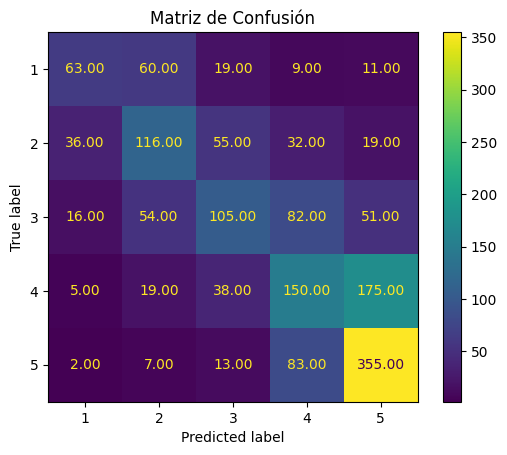


               precision    recall  f1-score   support

           1       0.52      0.39      0.44       162
           2       0.45      0.45      0.45       258
           3       0.46      0.34      0.39       308
           4       0.42      0.39      0.40       387
           5       0.58      0.77      0.66       460

    accuracy                           0.50      1575
   macro avg       0.49      0.47      0.47      1575
weighted avg       0.49      0.50      0.49      1575



In [ ]:
# Matriz de confusion

cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(values_format='.2f')
plt.title('Matriz de Confusión')
plt.show()

print('\n',classification_report(y_test, y_test_pred))

La matriz de confusión, junto con el reporte de clasificación, arrojan información muy valiosa acerca del rendimiento del algoritmo de clasificación. Por ejemplo, de la matriz de confusión se puede ver, a primera vista, que el modelo aprendió muy bien los límites de clasificación entre la clase 5 y las demás clases; sin embargo, el modelo no es muy bueno identificando los límites de clasificación entre las demás clases, como puede verse claramente en las clases 3 y 4, en las que predice con mayor frecuencia un rating superior al que realmente se obtuvo.

Lo anterior se ve reflejado numéricamente en el reporte de clasificación, en el cual la métrica que más nos interesa es, en este caso, el score f1, ya que es una buena métrica para evaluar correctamente el modelo en las situaciones en las que el dataset cuenta con una distribución desbalanceada de las clases (como se mostró en la sección de entendimiento de los datos, es el caso para este dataset). Al examinar los resultados de este score para cada clase, vemos que concuerda con el analisis realizado a partir de la matriz de confusión: el mejor score lo tiene, por una buena diferencia, la clase 5, mientras que las demas clases presentan scores inferiores a 0.5, siendo las clases 3 y 4 aquellas con el peor resultado.

A manera de hipótesis, estos resultados pueden deberse a cuán dicientes son las personas cuando de aspectos buenos o malos se trata, es decir: que las personas tiendan a ser mucho más detalladas en sus reseñas en los casos en que tienen una mala o muy mala experiencia, mientras que en los casos en que la experiencia es buena o exelente, utilizan muchas palabras o frases comunes, como por ejemplo: excelente servicio, muy buena ubicación, comida deliciosa, exelente atención, etc. lo cual hace que para el modelo sea más fácil identificar reseñas pertenecientes a las clases 4 y 5 que a las clases 1,2 y 3.
Por otro lado, consideramos que estos resultados también pueden deberse a la alta subjetividad presente en las clases intermedias 2,3 y 4, debido a que el limite entre los valores extremos 1 y 5 y los intermedios es un dependiente de cada persona, cosa que el modelo no puede capturar. Sin embargo, podría ser que al agrupar las clases de la siguiente manera, por ejemplo: malo (clases 1 y 2), neutral (clase 3) y bueno (clases 4 y 5), se reduzca la subjetividad inducida por las clases intermedias y se obtengan mejores resultados de clasificación.   



## Segundo modelo: Complement Naives Bayes con variación en la matriz TF-IDF

**Realizado por:** Juan Andrés Jaramillo
<br><br>

Matriz TF-IDF Construida manualmente con ayuda de las librerias Gensim y Spacy, filtrando por palabras consideradas en el Universal POS como 'PROPER NOUNS', 'NOUNS', 'ADJECTIVES' o 'VERBS'.

#### Normalización

In [ ]:
# Quitar caracteres especiales, puntuaciones, marcas diacríticas, números, emojis y demás ruido del texto
def preprepare(text):
    # Convierte el texto a minuscula
    processed_text = text.lower()

    # Reemplazar el carácter especial unicode '\xa0' con un espacio ' '
    processed_text = processed_text.replace(u'\xa0', u' ')

    # Reemplazar líneas vacías o líneas que contengan solo caracteres de espacio en blanco con un solo espacio
    processed_text = re.sub(r'^\s*$', ' ', str(processed_text))

    # Reemplazar '|' con un espacio
    processed_text = processed_text.replace('|', ' ')

    # Reemplazar varios caracteres especiales con espacios
    processed_text = processed_text.replace('ï', ' ')
    processed_text = processed_text.replace('»', ' ')
    processed_text = processed_text.replace('¿', '. ')
    processed_text = processed_text.replace('ï»¿', ' ')

    # Reemplazar comillas dobles y comillas simples con espacios
    processed_text = processed_text.replace('"', ' ')
    processed_text = processed_text.replace("'", " ")

    # Reemplazar signos de puntuación comunes con espacios
    processed_text = processed_text.replace('?', ' ')
    processed_text = processed_text.replace('!', ' ')
    processed_text = processed_text.replace(',', ' ')
    processed_text = processed_text.replace(';', ' ')
    processed_text = processed_text.replace('.', ' ')
    processed_text = processed_text.replace("(", " ")
    processed_text = processed_text.replace(")", " ")
    processed_text = processed_text.replace("{", " ")
    processed_text = processed_text.replace("}", " ")
    processed_text = processed_text.replace("[", " ")
    processed_text = processed_text.replace("]", " ")
    processed_text = processed_text.replace("~", " ")
    processed_text = processed_text.replace("@", " ")
    processed_text = processed_text.replace("#", " ")
    processed_text = processed_text.replace("$", " ")
    processed_text = processed_text.replace("%", " ")
    processed_text = processed_text.replace("^", " ")
    processed_text = processed_text.replace("&", " ")
    processed_text = processed_text.replace("*", " ")
    processed_text = processed_text.replace("<", " ")
    processed_text = processed_text.replace(">", " ")
    processed_text = processed_text.replace("/", " ")
    processed_text = processed_text.replace("\\", " ")
    processed_text = processed_text.replace("`", " ")
    processed_text = processed_text.replace("+", " ")
    processed_text = processed_text.replace("=", " ")
    processed_text = processed_text.replace("_", " ")
    processed_text = processed_text.replace("-", " ")
    processed_text = processed_text.replace(':', ' ')

    # Reemplazar marcas diacríticas en español con sus letras equivalentes sin marcas diacríticas
    processed_text = unidecode(processed_text)

    # Reemplazar caracteres de nueva línea con espacios
    processed_text = processed_text.replace('\n', ' ').replace('\r', ' ')

    # Reemplazar múltiples espacios consecutivos con un solo espacio
    processed_text = re.sub(" +", " ", processed_text)

    # Reemplazar cualquier carácter no alfabético con un espacio
    processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)

    # Reemplazar múltiples espacios consecutivos con un solo espacio nuevamente
    processed_text = re.sub(' +', ' ', processed_text)

    # Eliminar espacios en blanco antes de los signos de puntuación
    processed_text = re.sub(r'\s([?.!"](?:\s|$))', r'\1', processed_text)

    # Tokeniza las palabras para aplicar SnowballStemmer y reducir las palabras a su raiz: chica, chico -> chic.
    tokens = word_tokenize(processed_text, language="spanish")
    stemmed_tokens = [snow_stemmer.stem(t) for t in tokens]
    processed_text = " ".join(stemmed_tokens) #devuelve la lista de tokens a texto.

    # Devolver la cadena preprocesada
    return processed_text

In [ ]:
revs['Review_clean'] = revs['Review'].apply(preprepare)
revs['Review_clean']

0       muy buen atencion y aclar de dud por part de l...
1       buen hotel si estan oblig a estar cerc del cen...
2       es un lug muy lind par fotografi visit selin m...
3       abus con la factur de aliment siempr se echan ...
4       tuv un par de person en el grup que realment q...
                              ...                        
7870    me parec buen sistem agiliz el transport ya qu...
7871    fue una escap de un dia desd el complej fuim c...
7872    la plaz de la revolucion es un lug emblemat qu...
7873    es la segund ocasion que me qued en los cuart ...
7874    lleg por casual a los mercader un grup grand d...
Name: Review_clean, Length: 7875, dtype: object

#### Tokenización, Lemmatización y Eliminación de Stopwords

* Tokenización: Partir el texto en tokens (palabras/simbolos individuales).
* Quitar stopwords: Eliminar palabras que no aportan contenido semántico.
* Lematización: Reducir palabras a su forma base: Tuvisteis, tendremos, tendríamos -> tener.

In [ ]:
# nlp = spacy.load("es_dep_news_trf") # Muy pesado pero mas Accurate.
nlp = spacy.load("es_core_news_sm") # Mas eficiente.

In [ ]:
# Ej de lo que hace spacy nlp
doc = nlp("Esto es una frase, quiero comer.")
print([(w.text, w.pos_) for w in doc])

[('Esto', 'PRON'), ('es', 'AUX'), ('una', 'DET'), ('frase', 'NOUN'), (',', 'PUNCT'), ('quiero', 'VERB'), ('comer', 'VERB'), ('.', 'PUNCT')]


In [ ]:
# Funcion para realizar la tokenizacion, lemmatizacion y la eliminacion de stopwords (conectores y demas palabras que no agregan contenido al texto).
def tokenize_lemmatize(text):
    """
      Función que tokeniza, lemmatiza, quita stopwords y demas palabras que no aportan contenido semantico
      en el documento. Solo se dejan palabras (tokens) catalogadas como Proper-Nouns, Nouns, Adjetives y Verbs
      por el UPOS (Universal Part-Of-Speech).

      Dependencias:
      nltk.download('stopwords')
      stopwords = set(nltk.corpus.stopwords.words("spanish"))
      nlp = spacy.load("es_dep_news_trf")
    """
    doc = nlp(text)
    VALID_POS = {'PROPN', 'NOUN', 'ADJ','VERB'}
    return [
        word.lemma_ for word in doc if word.lemma_ not in stopwords
        and word.pos_ in VALID_POS
        ]

In [ ]:
revs['Review_clean'] = revs['Review_clean'].apply(tokenize_lemmatize)

**Construcción matriz TF-IDF:**

In [ ]:
# Construcción matriz TF-IDF
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import ast

#Convierte cada elemento de revs['Review_clean'] en un objeto de tipo lista.
#Esta linea solo es necesaria si se cargó el archivo revs_avances.csv en pasos anteriores.
#revs['Review_clean'] = revs['Review_clean'].apply(ast.literal_eval)

documents = revs['Review_clean'].tolist()
dct = Dictionary(documents) # Construye un diccionario con todas las palabras en el corpus.

corpus = [dct.doc2bow(line) for line in documents]
tfidf = TfidfModel(corpus)  # fit model

tfidf_matrix = tfidf[corpus]

# Visualizacion de la estructura de la matriz tfidf_matrix:
for doc in tfidf_matrix[:2]:
    print([[dct[id], np.around(freq,decimals=2)] for id, freq in doc])

[['aclar', 0.29], ['amabl', 0.13], ['atencion', 0.11], ['atent', 0.16], ['buen', 0.17], ['castill', 0.21], ['com', 0.09], ['cuestion', 0.25], ['descans', 0.2], ['habit', 0.07], ['ideal', 0.21], ['labor', 0.32], ['limpiez', 0.17], ['ordir', 0.37], ['part', 0.25], ['restaur', 0.09], ['senorit', 0.26], ['varied', 0.18], ['veron', 0.44]]
[['buen', 0.05], ['restaur', 0.08], ['barri', 0.22], ['bu', 0.41], ['caf', 0.16], ['centr', 0.13], ['cerc', 0.14], ['convencion', 0.29], ['deberi', 0.2], ['especial', 0.14], ['floj', 0.29], ['fri', 0.19], ['hotel', 0.12], ['mejor', 0.09], ['monton', 0.16], ['necesit', 0.16], ['oblig', 0.17], ['opcion', 0.15], ['pan', 0.22], ['person', 0.12], ['poc', 0.1], ['servici', 0.07], ['signif', 0.27], ['uderstanding', 0.41]]


**Construcción del dataframe TF-IDF:**

In [ ]:
vocab = [dct[i] for i in range(len(dct))]

index = list(range(len(corpus)))

df_tfidf = pd.DataFrame(data=np.zeros((len(corpus), len(vocab)), dtype=np.float16),
                  index=index,
                  columns=vocab)

for idx in index:
    for id, freq in tfidf[corpus[idx]]:
        df_tfidf[dct[id]][idx] = freq



In [ ]:
print(df_tfidf.shape,"\n")
df_tfidf.head()

(7875, 12698) 



,aclar,amabl,atencion,atent,buen,castill,com,cuestion,descans,habit,...,pulul,bek,cervant,cursis,elton,incluyent,comit,megaconciert,ministr,casual
0,0.289393,0.128987,0.111052,0.158424,0.168659,0.213192,0.086157,0.25218,0.195727,0.074001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.052737,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.083076,0.000000,0.063657,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.050712,0.000000,0.155432,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Correr el modelo utilizando la matriz tf-idf construida con con gensim y utilizando el paquete de Spacy para filtrar las palabras en español

X_train, X_test, y_train, y_test = train_test_split(df_tfidf, revs['Class'], test_size=0.3, random_state=1)

clf = ComplementNB(alpha=1.0)
clf.fit(X_train, y_train)

# Impresion de resultados
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print("Metricas para el conjunto de test")
print('Exactitud: %.2f' % accuracy_score(y_test, y_test_pred))
print("Recall: {:.3f}".format(recall_score(y_test,y_test_pred, average = 'weighted')))
print("Precisión: {:.3f}".format(precision_score(y_test,y_test_pred, average = 'weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_test,y_test_pred, average = 'weighted')))
print("="*20)
print("Metricas para el conjunto de train")
print('Exactitud: %.2f' % accuracy_score(y_train, y_train_pred))
print("Recall: {:.3f}".format(recall_score(y_train,y_train_pred, average = 'weighted')))
print("Precisión: {:.3f}".format(precision_score(y_train,y_train_pred, average = 'weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_train,y_train_pred, average = 'weighted')))

Metricas para el conjunto de test
Exactitud: 0.47
Recall: 0.474
Precisión: 0.459
Puntuación F1: 0.462
Metricas para el conjunto de train
Exactitud: 0.84
Recall: 0.842
Precisión: 0.848
Puntuación F1: 0.841


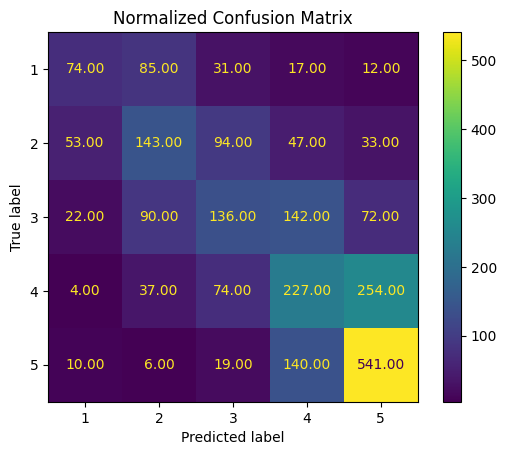


               precision    recall  f1-score   support

           1       0.45      0.34      0.39       219
           2       0.40      0.39      0.39       370
           3       0.38      0.29      0.33       462
           4       0.40      0.38      0.39       596
           5       0.59      0.76      0.66       716

    accuracy                           0.47      2363
   macro avg       0.44      0.43      0.43      2363
weighted avg       0.46      0.47      0.46      2363



In [ ]:
# Matriz de confusion

classes = sorted(revs['Class'].unique()) # clases: 1, 2, 3, 4 y 5.
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()

print('\n',classification_report(y_test, y_test_pred))

La interpretación de los resultados obtenidos para este modelo es muy similar a la intepretación que ya se dió para el modelo anterior.

Lo que vale la pena resaltar en este modelo es que si bien los resultados son muy similares a los obtenidos con el modelo anterior, estos son inferiores, y por lo tanto, por ahora se toma de decisión de priorizar el modelo anterior sobre este.

## Tercer Modelo: Nearest Centroid (Rocchio Classifier)

**Realizado por:** Daniel Santiago Rappy

In [ ]:
# Construccion del pipeline para el random Search.
pipeline_nearestCentroid = Pipeline(
    [
        ('transform_to_array', data_as_array),
        ('preprocess_documents', text_preprocessor),
        ("vect", TfidfVectorizer(stop_words=stopwords_list)),
        ("clf", NearestCentroid()),
    ]
)

pipeline_nearestCentroid

Pipeline(steps=[('transform_to_array',
                 Pipeline(steps=[('to-numpy',
                                  FunctionTransformer(func=<function df_to_array at 0x7dd38c71dfc0>))])),
                ('preprocess_documents',
                 Pipeline(steps=[('text-preprocessor',
                                  FunctionTransformer(func=<function preprocess at 0x7dd38c71e440>))])),
                ('vect',
                 TfidfVectorizer(stop_words=['estaría', 'estuvieras',
                                             'vosotros', 'entre', 'nada',
                                             'seas', 'tendrían', 'durante',
                                             'estuvierais', 'sentid', 'nuestra',
                                             'hubieras', 'estuvisteis',
                                             'teníamos', 'tenidos', 'hayas',
                                             'estaréis', 'ti', 'habrás',
                                             'seríamos', 'estuviésemos', 'su',
                                             'estéis', 'estábamos', 'serías',
                                             'sean', 'mucho', 'nosotras',
                                             'cuando', 'tendrás', ...])),
                ('clf', NearestCentroid())])

In [ ]:
# Random Search sobre el algoritmo de: Nearest Centroid (Solo es necesario correrlo 1 vez)

X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.2, random_state=1)

parameter_grid = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vect__norm": ("l1", "l2"),
    "clf__metric": ("manhattan", "euclidean"),
}

stratified_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

random_search = RandomizedSearchCV(
    estimator=pipeline_nearestCentroid,
    param_distributions=parameter_grid,
    n_iter=100,
    random_state=0,
    n_jobs=-1,
    verbose=1,
    cv=stratified_kfold,
)


t0 = time()
random_search.fit(X_train, y_train)
print(f"Done in {time() - t0:.3f}s")


print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")


test_accuracy = random_search.score(X_test, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Done in 1157.984s
Best parameters combination found:
clf__metric: euclidean
vect__max_df: 0.2
vect__min_df: 1
vect__ngram_range: (1, 2)
vect__norm: l2
Accuracy of the best parameters using the inner CV of the random search: 0.466
Accuracy on test set: 0.465


In [ ]:
# Se construye el Pipeline nuevamente, pero con los mejores parametros encontrados por el random_search.

pipeline_nearestCentroid_optimal = Pipeline(
    [
        ('transform_to_array', data_as_array),
        ('preprocess_documents', text_preprocessor),
        ("vect", TfidfVectorizer(stop_words=stopwords_list, max_df = 0.2, min_df=1, ngram_range= (1, 2), norm= "l2" )),
        ("clf", NearestCentroid(metric="euclidean")),
    ]
)

pipeline_nearestCentroid_optimal

Pipeline(steps=[('transform_to_array',
                 Pipeline(steps=[('to-numpy',
                                  FunctionTransformer(func=<function df_to_array at 0x797e180f63b0>))])),
                ('preprocess_documents',
                 Pipeline(steps=[('text-preprocessor',
                                  FunctionTransformer(func=<function preprocess at 0x797e180f6440>))])),
                ('vect',
                 TfidfVectorizer(max_df=0.2, ngram_range=(1, 2),
                                 stop_words=['suyo', 'fueron', 'tuviste',
                                             'vuestra', 'tendrá', 'uno', 'sin',
                                             'soy', 'tenía', 'esté', 'un',
                                             'tienen', 'estuvimos', 'estaréis',
                                             'hubiera', 'fueran', 'fue',
                                             'siente', 'se', 'sean', 'otro',
                                             'fui', 'estuvieseis', 'estaban',
                                             'estuve', 'tuvieran', 'algo',
                                             'habíamos', 'hube', 'sois', ...])),
                ('clf', NearestCentroid())])

In [ ]:
# Metricas del modelo:
X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.3, random_state=1)

pipeline_nearestCentroid_optimal.fit(X_train, y_train)
y_test_pred = pipeline_nearestCentroid_optimal.predict(X_test)
y_train_pred = pipeline_nearestCentroid_optimal.predict(X_train)

print("Metricas para el conjunto de test")
print('Exactitud: %.2f' % accuracy_score(y_test, y_test_pred))
print("Recall: {:.3f}".format(recall_score(y_test,y_test_pred, average = 'weighted')))
print("Precisión: {:.3f}".format(precision_score(y_test,y_test_pred, average = 'weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_test,y_test_pred, average = 'weighted')))
print("="*20)
print("Metricas para el conjunto de train")
print('Exactitud: %.2f' % accuracy_score(y_train, y_train_pred))
print("Recall: {:.3f}".format(recall_score(y_train,y_train_pred, average = 'weighted')))
print("Precisión: {:.3f}".format(precision_score(y_train,y_train_pred, average = 'weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_train,y_train_pred, average = 'weighted')))

Metricas para el conjunto de test
Exactitud: 0.46
Recall: 0.465
Precisión: 0.476
Puntuación F1: 0.468
Metricas para el conjunto de train
Exactitud: 0.87
Recall: 0.874
Precisión: 0.875
Puntuación F1: 0.874


In [ ]:
# Impresión de los tokens mas significativos por clase.

# Se accede al tfidfVectorizer y al objeto NearestCentroids del pipeline.
vectorizer = pipeline_nearestCentroid_optimal.named_steps['vect']
clf = pipeline_nearestCentroid_optimal.named_steps['clf']

# Vector de centroide de cada clase.
centroid_vectors = clf.centroids_

# Extraer y guardar todos los tokens
feature_names = vectorizer.get_feature_names_out()

# Estructura para almacenar los tokens más significativos de cada clase.
significant_tokens = {}

top_n = 10
classes = sorted(revs['Class'].unique()) # clases: 1, 2, 3, 4 y 5.

for i, class_name in enumerate(classes):
    class_centroid = centroid_vectors[i]
    top_indices = class_centroid.argsort()[-top_n:][::-1]
    significant_tokens[class_name] = [feature_names[idx] for idx in top_indices]

# Impresion de los tokens mas significativos para cada clase.
for class_name, tokens in significant_tokens.items():
    print(f"Class: {class_name}")
    print("Top significant tokens:", tokens)
    print()

Class: 1
Top significant tokens: ['habitacion', 'habia', 'solo', 'mala', 'mal', 'agua', 'peor', 'pesimo', 'dia', 'dos']

Class: 2
Top significant tokens: ['habitacion', 'solo', 'mal', 'habia', 'habitaciones', 'asi', 'bien', 'ser', 'gente', 'agua']

Class: 3
Top significant tokens: ['bien', 'buena', 'habitacion', 'solo', 'habana', 'habitaciones', 'bueno', 'mejor', 'ciudad', 'personal']

Class: 4
Top significant tokens: ['buena', 'bien', 'habana', 'ciudad', 'buen', 'excelente', 'agradable', 'historia', 'vista', 'bueno']

Class: 5
Top significant tokens: ['excelente', 'atencion', 'buena', 'bien', 'ciudad', 'buen', 'personal', 'mejor', 'restaurante', 'ambiente']



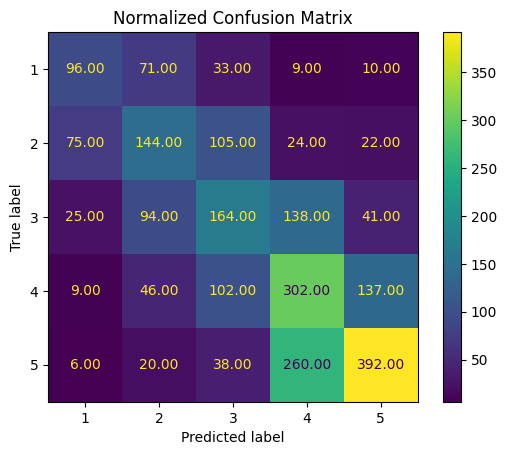


               precision    recall  f1-score   support

           1       0.45      0.44      0.45       219
           2       0.38      0.39      0.39       370
           3       0.37      0.35      0.36       462
           4       0.41      0.51      0.45       596
           5       0.65      0.55      0.59       716

    accuracy                           0.46      2363
   macro avg       0.45      0.45      0.45      2363
weighted avg       0.48      0.46      0.47      2363



In [ ]:
# Matriz de confusion

cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()

print('\n',classification_report(y_test, y_test_pred))

## Cuarto Modelo: Logistic Regression

**Realizado por:** Nicole Murillo Fonseca

Optar por el algoritmo de Regresión Logística en este proyecto de aprendizaje automático puede ser una elección adecuada por varias razones. Esta técnica ofrece la ventaja de brindar una interpretación clara de los resultados, lo que ayuda a entender cómo cada característica afecta la calificación de los sitios turísticos. Además, es eficiente en términos de recursos computacionales, lo que es crucial cuando se trabaja con grandes volúmenes de datos. Con estos beneficios en mente, utilizar este enfoque nos permitirá analizar y predecir las preferencias de los turistas con respecto a las características de distintos sitios turísticos.
<br><br>
**A continuación se presenta el modelo:**

Para el proceso de implementación del modelo de Regresión Logística, primero se establece un pipeline en el cual se preparan los datos para el análisis y luego se limpian para eliminar cualquier símbolo o carácter que no aporte valor al modelo analítico. Después, se transforma el texto utilizando una técnica llamada TF-IDF, que sirve para entender qué palabras son más relevantes en cada texto.

In [ ]:
# Construcción del pipeline para el random Search

pipeline_logistic_regression = Pipeline([
    ('transform_to_array', data_as_array),
    ('preprocess_documents', text_preprocessor),
    ("vect", TfidfVectorizer(stop_words=stopwords_list)),
    ("clf", LogisticRegression()),
])

Para encontrar la mejor configuración para el modelo se realiza una búsqueda que explora diferentes combinaciones de ajustes para ver cuáles funcionan mejor para predecir la calificación de los textos. Estos ajustes incluyen cosas como la frecuencia máxima y mínima de las palabras, y cómo queremos tratar las palabras compuestas (como los bigramas).

Para la búsqueda de hiperparámetros, se define un espacio de búsqueda mediante un diccionario llamado parameter_grid, que contiene los hiperparámetros relevantes para la vectorización del texto y para el algoritmo de Regresión Logística.

Se utiliza el método RandomizedSearchCV para encontrar los mejores hiperparámetros, lo que proporciona una configuración óptima para el conjunto de datos. Este proceso se realiza utilizando la técnica de validación cruzada StratifiedKFold para garantizar una evaluación precisa del rendimiento del modelo.

In [ ]:
# Random Search sobre el algoritmo de Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.3, random_state=1)

parameter_grid_logistic = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vect__norm": ("l1", "l2"),
    "clf__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}


n_splits = 5

stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

# Random Search sobre el algoritmo de Logistic Regression con StratifiedKFold

random_search_logistic = RandomizedSearchCV(
    estimator=pipeline_logistic_regression,
    param_distributions=parameter_grid_logistic,
    n_iter=100,
    random_state=0,
    n_jobs=-1,
    verbose=1,
    cv=stratified_kfold  # Validación cruzada
)

t0 = time()
random_search_logistic.fit(X_train, y_train)
print(f"Done in {time() - t0:.3f}s")

print("Best parameters combination found:")
best_parameters_logistic = random_search_logistic.best_estimator_.get_params()
for param_name in sorted(parameter_grid_logistic.keys()):
    print(f"{param_name}: {best_parameters_logistic[param_name]}")

test_accuracy_logistic = random_search_logistic.score(X_test, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search_logistic.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy_logistic:.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done in 7294.459s
Best parameters combination found:
clf__C: 10
vect__max_df: 0.6
vect__min_df: 1
vect__ngram_range: (1, 2)
vect__norm: l2
Accuracy of the best parameters using the inner CV of the random search: 0.497
Accuracy on test set: 0.503


Después de ejecutar la búsqueda aleatoria de hiperparámetros para el modelo de Regresión Logística, se encontró la combinación óptima de parámetros que maximiza la precisión del modelo. Los resultados revelan que el valor óptimo para el hiperparámetro C, que controla la regularización del modelo, es 10. Además, se puede observar que el parámetro max_df, encargado de limitar la frecuencia máxima de las palabras, se fijó en 0.6, indicando la exclusión de palabras que aparecen en más del 60% de los documentos. Por otro lado, el parámetro min_df, se configuró en 1, lo que implica la inclusión de todas las palabras que aparecen al menos una vez. La elección de vect__ngram_range en (1, 2) indica que se consideraron tanto unigramas como bigramas en el análisis de los textos. Por último, se aplicó la normalización L2 a los vectores de características.
<br><br>
Como resultado de esto, y utilizando validación cruzada, se obtuvo una precisión media del modelo de aproximadamente 0.497. Además, al evaluar el modelo en el conjunto de prueba, se observó una precisión del 0.503. Esto sugiere que el modelo generaliza bien a datos no vistos y es capaz de predecir con precisión las calificaciones de los textos turísticos.

Una vez que se define la mejor combinación de ajustes, se ajusta el modelo con esos parámetros en el pipeline.

In [ ]:
# Se construye el Pipeline nuevamente, pero con los mejores parametros encontrados por el random_search.

pipeline_logistic_regression_optimal = Pipeline(
    [
        ('transform_to_array', data_as_array),
        ('preprocess_documents', text_preprocessor),
        ("vect", TfidfVectorizer(stop_words=stopwords_list, max_df=0.6, min_df=1, ngram_range=(1, 2), norm="l2")),
        ("clf", LogisticRegression(C=10)),
    ]
)

pipeline_logistic_regression_optimal

Pipeline(steps=[('transform_to_array',
                 Pipeline(steps=[('to-numpy',
                                  FunctionTransformer(func=<function df_to_array at 0x797e180f63b0>))])),
                ('preprocess_documents',
                 Pipeline(steps=[('text-preprocessor',
                                  FunctionTransformer(func=<function preprocess at 0x797e180f6440>))])),
                ('vect',
                 TfidfVectorizer(max_df=0.6, ngram_range=(1, 2),
                                 stop_words=['suyo', 'fueron', 'tuviste',
                                             'vuestra', 'tendrá', 'uno', 'sin',
                                             'soy', 'tenía', 'esté', 'un',
                                             'tienen', 'estuvimos', 'estaréis',
                                             'hubiera', 'fueran', 'fue',
                                             'siente', 'se', 'sean', 'otro',
                                             'fui', 'estuvieseis', 'estaban',
                                             'estuve', 'tuvieran', 'algo',
                                             'habíamos', 'hube', 'sois', ...])),
                ('clf', LogisticRegression(C=10))])

Se calcula la precisión y otras métricas del modelo utilizando datos desconocidos, esto permite medir su rendimiento de manera objetiva y determinar su eficacia en la clasificación de las reseñas.

In [ ]:
# Metricas del modelo

X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.2, random_state=1)

pipeline_logistic_regression_optimal.fit(X_train, y_train)
y_test_pred = pipeline_logistic_regression_optimal.predict(X_test)

print("Metricas para el conjunto de test")
print('Exactitud: %.2f' % accuracy_score(y_test, y_test_pred))
print("Recall: {:.3f}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precisión: {:.3f}".format(precision_score(y_test, y_test_pred, average='weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_test, y_test_pred, average='weighted')))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metricas para el conjunto de test
Exactitud: 0.51
Recall: 0.512
Precisión: 0.512
Puntuación F1: 0.508


Para el conjunto de prueba, las métricas obtenidas fueron las siguientes: una exactitud del 0.51, que indica la proporción de predicciones correctas sobre el total de instancias; un recall del 0.512, que representa la capacidad del modelo para identificar correctamente las instancias positivas; una precisión del 0.512; y, finalmente, una puntuación F1 del 0.508.
<br><br>
Aunque el modelo muestra un desempeño moderado, aún existen áreas donde se pueden realizar mejoras para lograr una predicción más precisa de la calificación de reseñas turísticas.


Ahora bien, la impresión de los tokens más significativos por clase después de ajustar el modelo permite entender qué palabras o características del texto están contribuyendo más a la predicción de cada clase de manera significativa. Esto proporciona insights sobre qué aspectos del texto son más relevantes para la clasificación y puede ayudar a interpretar y explicar las decisiones y resultados del modelo de manera más detallada.

In [ ]:
# Impresión de los tokens más significativos por clase después de ajustar el modelo

# Se accede al TfidfVectorizer y al objeto LogisticRegression del pipeline
vectorizer_logistic = pipeline_logistic_regression_optimal.named_steps['vect']
clf_logistic = pipeline_logistic_regression_optimal.named_steps['clf']

# Coeficientes (pesos) del modelo de regresión logística
coefficients = clf_logistic.coef_

# Nombre de las características (tokens)
feature_names_logistic = vectorizer_logistic.get_feature_names_out()

# Estructura para almacenar los tokens más significativos de cada clase.
significant_tokens_logistic = {}

top_n = 10
classes = sorted(revs['Class'].unique())  # Clases: 1, 2, 3, 4 y 5.

for i, class_name in enumerate(classes):
    class_coefficients = coefficients[i]
    top_indices = class_coefficients.argsort()[-top_n:][::-1]
    significant_tokens_logistic[class_name] = [feature_names_logistic[idx] for idx in top_indices]

for class_name, tokens in significant_tokens_logistic.items():
    print(f"Class: {class_name}")
    print("Top significant tokens:", tokens)
    print()


Class: 1
Top significant tokens: ['pesim', 'peor', 'mal', 'suci', 'nad', 'horribl', 'rob', 'nunc', 'cuand', 'engan']

Class: 2
Top significant tokens: ['mal', 'decepcion', 'suci', 'car', 'nad', 'habi', 'cuand lleg', 'manten', 'asi', 'dej']

Class: 3
Top significant tokens: ['demasi', 'poc', 'embarg', 'falt', 'algun', 'turist', 'rap', 'normal', 'sals delici', 'general']

Class: 4
Top significant tokens: ['comod', 'disfrut', 'agrad', 'vist', 'centr', 'encuentr', 'haban', 'histori', 'excelent', 'buen instal']

Class: 5
Top significant tokens: ['excelent', 'increibl', 'delici', 'encant', 'hermos', 'maravill', 'graci', 'recomend', 'atent', 'gran']



Los tokens más significativos identificados después de ajustar el modelo de regresión logística proporcionan información valiosa sobre las características del texto que más influyen en la predicción de cada clase. Por ejemplo, en la clase 1, tokens como "pesim", "peor", y "mal" sugieren la presencia de comentarios negativos y críticas en las reseñas asociadas con esa clase. Mientras tanto, en la clase 5, tokens como "excelent", "increibl", y "delici" indican opiniones positivas sobre las experiencias turísticas.



Por su parte, la matriz de confusión permite visualizar cómo el modelo de regresión logística ha clasificado las etiquetas de prueba en comparación con las etiquetas reales. Al representar los resultados de manera gráfica, es posible identificar rápidamente dónde se producen errores y evaluar la precisión del modelo en la clasificación de cada clase.

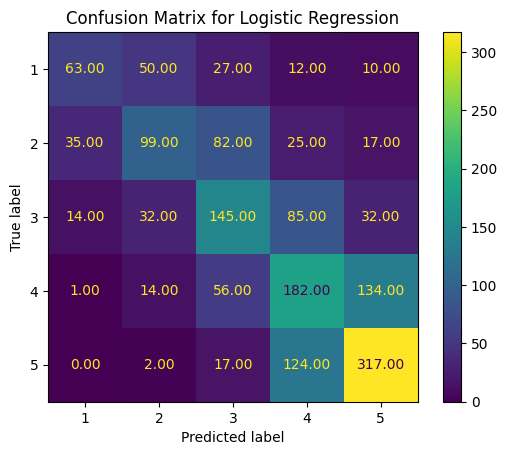


               precision    recall  f1-score   support

           1       0.56      0.39      0.46       162
           2       0.50      0.38      0.44       258
           3       0.44      0.47      0.46       308
           4       0.43      0.47      0.45       387
           5       0.62      0.69      0.65       460

    accuracy                           0.51      1575
   macro avg       0.51      0.48      0.49      1575
weighted avg       0.51      0.51      0.51      1575



In [ ]:
# Matriz de confusión

cm_logistic = confusion_matrix(y_test, y_test_pred)

disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=classes)
disp_logistic.plot(values_format='.2f')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

print('\n',classification_report(y_test, y_test_pred))

La matriz de confusión proporciona una visión detallada del rendimiento del modelo de clasificación. Es positivo observar que los valores en la diagonal principal de la matriz son los más altos, ya que representan las instancias que el modelo ha clasificado correctamente. Por otro lado, los valores fuera de la diagonal principal indican las instancias que el modelo ha clasificado incorrectamente.
<br><br>
Por ejemplo, en la matriz resultante, la celda (4,1) tiene un valor de 0, esto implica que el modelo no ha clasificado correctamente ninguna instancia de clase 4 como perteneciente a la clase 1. Mientras que, la celda (4,5) tiene un valor de 200, lo que sugiere que el modelo ha clasificado incorrectamente 200 instancias como pertenecientes a la clase 5. Esto puede sugerir un área específica donde el modelo necesita mejorar su capacidad para distinguir entre las clases. Es de esperarse que el modelo tenga dificultades para diferenciar entre clases contiguas, como las clases 4 y 5 en este caso; ya que, las reseñas asociadas a estas clases pueden contener características y temas similares, lo que dificulta la diferenciación precisa. De hecho, podemos observar escenarios similares en las celdas (1,2), (2,3) y (3,4).

### Conlusiones

El modelo de regresión logística presenta una buena precisión y exactitud en la clasificación de las reseñas turísticas, lo que sugiere que es capaz de capturar patrones significativos en los datos. Los tokens más significativos identificados después del ajuste del modelo están alineados con las expectativas de cada clase, lo que indica que el modelo está considerando las características relevantes de cada categoría. Por su parte, la matriz de confusión revela que el modelo tiende a cometer más errores en la clasificación de clases contiguas, lo que puede deberse a la similitud en las características de las reseñas.
<br><br>
No obstante, aunque el modelo presenta un rendimiento aceptable, las métricas sugieren que podrían ser necesarios ajustes adicionales o considerar otros enfoques de modelado para obtener resultados más confiables en la predicción de las calificaciones de las reseñas turísticas.

## Quinto Modelo: Support Vector Machines (SVM)

**Realizado por:** Nicole Murillo Fonseca

Este enfoque ofrece la ventaja de proporcionar un alto rendimiento predictivo al trabajar con conjuntos de datos complejos y de alta dimensionalidad, como los datos de reseñas turísticas. Además, SVM es resistente frente a la presencia de ruido en los datos y puede manejar de forma más eficaz conjuntos de datos desequilibrados.
<br><br>
**A continuación se presenta el modelo:**

El pipeline para SVM sigue un enfoque similar al de Regresión Logística, prepara los datos y convierte el texto mediante TF-IDF.

In [ ]:
# Construcción del pipeline para SVM

pipeline_svm = Pipeline([
    ('transform_to_array', data_as_array),
    ('preprocess_documents', text_preprocessor),
    ("vect", TfidfVectorizer(stop_words=stopwords_list)),
    ("clf", SVC()),
])

SVM sigue un enfoque similar al utilizado para Regresión Logística. Se establece un espacio de búsqueda para los hiperparámetros relevantes, que se define en el diccionario parameter_grid_svm.
<br><br>
Después, se emplea el método de búsqueda aleatoria RandomizedSearchCV para explorar diferentes combinaciones de estos hiperparámetros y encontrar la configuración óptima para el modelo de SVM. Esta búsqueda se realiza utilizando la técnica de validación cruzada StratifiedKFold para garantizar una evaluación precisa del rendimiento del modelo.




In [ ]:
# Random Search sobre el algoritmo de SVM

X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.2, random_state=1)

parameter_grid_svm = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams o bigrams (tokens de una sola palabra o de hasta 2 palabras)
    "vect__norm": ("l1", "l2"),
    "clf__C": [0.001, 0.01, 0.1, 1, 10, 100],
}


n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

# Random Search sobre el algoritmo de SVM con StratifiedKFold
random_search_svm = RandomizedSearchCV(
    estimator=pipeline_svm,
    param_distributions=parameter_grid_svm,
    n_iter=100,
    random_state=0,
    n_jobs=-1,
    verbose=1,
    cv=stratified_kfold,  # Validación cruzada
)

t0 = time()
random_search_svm.fit(X_train, y_train)
print(f"Done in {time() - t0:.3f}s")

print("Best parameters combination found:")
best_parameters_svm = random_search_svm.best_estimator_.get_params()
for param_name in sorted(parameter_grid_svm.keys()):
    print(f"{param_name}: {best_parameters_svm[param_name]}")

test_accuracy_svm = random_search_svm.score(X_test, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search_svm.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy_svm:.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Done in 14603.878s
Best parameters combination found:
clf__C: 100
vect__max_df: 0.8
vect__min_df: 3
vect__ngram_range: (1, 2)
vect__norm: l2
Accuracy of the best parameters using the inner CV of the random search: 0.506
Accuracy on test set: 0.521


Después de llevar a cabo la búsqueda aleatoria de hiperparámetros para el modelo de SVM, se logró encontrar la combinación óptima que maximiza la precisión del modelo. Los resultados obtenidos muestran que el mejor valor para el hiperparámetro C, que controla la regularización del modelo, es 100. Además, se observa que el parámetro max_df, responsable de limitar la frecuencia máxima de las palabras, se estableció en 0.8, lo que sugiere la exclusión de palabras que aparecen en más del 80% de los documentos. Por otro lado, el parámetro min_df se configuró en 3, lo que implica la inclusión de palabras que aparecen al menos tres veces. En cuanto a vect__ngram_range, se optó por considerar tanto unigramas como bigramas en el análisis de los textos, indicado por (1, 2). Por último, se aplicó la normalización L2 a los vectores de características.
<br><br>
Como resultado de esta búsqueda y utilizando la validación cruzada, se logró obtener una precisión media del modelo de aproximadamente 0.506. Al evaluar el modelo en el conjunto de prueba, se observó una precisión del 0.521. Estos resultados indican que el modelo generaliza bien a datos no vistos y es capaz de predecir con precisión las calificaciones de los textos turísticos. Esta precisión superior en comparación con otros modelos implementados hasta el momento, sugiere que el modelo SVM puede ser la mejor opción para este proyecto y el cumplimiento de sus objetivos.

Una vez que se define la mejor combinación de ajustes, se ajusta el modelo con esos parámetros en el pipeline.

In [ ]:
# Se construye el Pipeline nuevamente, pero con los mejores parametros encontrados por el random_search

pipeline_svm_optimal = Pipeline(
    [
        ('transform_to_array', data_as_array),
        ('preprocess_documents', text_preprocessor),
        ("vect", TfidfVectorizer(stop_words=stopwords_list, max_df=0.8, min_df=3, ngram_range=(1, 2), norm="l2")),
        ("clf", SVC(C=100)),
    ]
)

pipeline_svm_optimal

Pipeline(steps=[('transform_to_array',
                 Pipeline(steps=[('to-numpy',
                                  FunctionTransformer(func=<function df_to_array at 0x797e180f63b0>))])),
                ('preprocess_documents',
                 Pipeline(steps=[('text-preprocessor',
                                  FunctionTransformer(func=<function preprocess at 0x797e180f6440>))])),
                ('vect',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2),
                                 stop_words=['suyo', 'fueron', 'tuviste',
                                             'vuestra', 'tendrá', 'uno', 'sin',
                                             'soy', 'tenía', 'esté', 'un',
                                             'tienen', 'estuvimos', 'estaréis',
                                             'hubiera', 'fueran', 'fue',
                                             'siente', 'se', 'sean', 'otro',
                                             'fui', 'estuvieseis', 'estaban',
                                             'estuve', 'tuvieran', 'algo',
                                             'habíamos', 'hube', 'sois', ...])),
                ('clf', SVC(C=100))])

Se calculan otras métricas del modelo que permiten medir su rendimiento de manera objetiva y determinar su eficacia en la clasificación de las reseñas.

In [ ]:
# Metricas del modelo

X_train, X_test, y_train, y_test = train_test_split(revs['Review'], revs['Class'], test_size=0.2, random_state=1)

pipeline_svm_optimal.fit(X_train, y_train)
y_test_pred_svm = pipeline_svm_optimal.predict(X_test)

print("Metricas para el conjunto de test")
print('Exactitud: %.2f' % accuracy_score(y_test, y_test_pred_svm))
print("Recall: {:.3f}".format(recall_score(y_test, y_test_pred_svm, average='weighted')))
print("Precisión: {:.3f}".format(precision_score(y_test, y_test_pred_svm, average='weighted')))
print("Puntuación F1: {:.3f}".format(f1_score(y_test, y_test_pred_svm, average='weighted')))

Metricas para el conjunto de test
Exactitud: 0.52
Recall: 0.521
Precisión: 0.523
Puntuación F1: 0.516


Las métricas obtenidas para el modelo SVM en el conjunto de prueba muestran una mejora en comparación con la Regresión Logística. Con una exactitud de 0.52, el modelo SVM clasifica correctamente el 52% de las instancias en el conjunto de prueba. El recall de 0.521 indica que el modelo SVM puede identificar el 52.1% de todas las instancias que realmente pertenecen a una clase específica. Finalmente, se obtuvo una precisión de 0.523 y una puntuación F1 de 0.516.

Ahora bien, como se mencionó previamente, la matriz de confusión permite visualizar cómo el modelo SVM ha clasificado las etiquetas de prueba en comparación con las etiquetas reales.

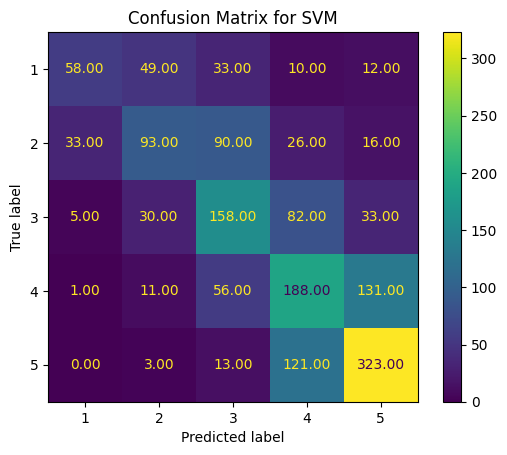


               precision    recall  f1-score   support

           1       0.56      0.39      0.46       162
           2       0.50      0.38      0.44       258
           3       0.44      0.47      0.46       308
           4       0.43      0.47      0.45       387
           5       0.62      0.69      0.65       460

    accuracy                           0.51      1575
   macro avg       0.51      0.48      0.49      1575
weighted avg       0.51      0.51      0.51      1575



In [ ]:
# Matriz de confusión para SVM

cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Visualización de la matriz de confusión
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=classes)
disp_svm.plot(values_format='.2f')
plt.title('Confusion Matrix for SVM')
plt.show()

print('\n',classification_report(y_test, y_test_pred))

Observamos que los valores en la diagonal principal son relativamente bajos en comparación con los valores en la matriz de Regresión Logística, lo que sugiere que el modelo SVM tiene una precisión ligeramente menor en la clasificación correcta de las instancias. No obstante, los valores fuera de la diagonal principal son generalmente más bajos, lo que indica una menor cantidad de clasificaciones incorrectas. Por ejemplo, en la celda (4,1), el valor es 1, lo que indica que el modelo ha clasificado incorrectamente una instancia de la clase 4 como perteneciente a la clase 1; en Regresión Logística el valor fue de 0. Sin embargo, en la celda (4,5), el valor es 131, lo que sugiere que el modelo ha clasificado incorrectamente 131 instancias como pertenecientes a la clase 5 en lugar de la clase 4; es decir, 69 instancias menos que con el modelo de Regresión Logística.
<br><br>
El modelo SVM también tiene algunas dificultades para diferenciar instancias entre clases contiguas.

### Conclusiones

El modelo SVM tuvo la mejor precisión y exactitud en la clasificación de las reseñas turísticas entre los 5 modelos propuestos, lo que sugiere que es capaz de capturar patrones significativos en los datos. Además, fue posible observar a partir de la matriz de confusión, que el modelo clasificó erróneamente menos instancias que otros modelos; no obstante, cabe destacar que a comparación del modelo de Regresión Logística, también tuvo menos instancias catalogadas de la forma correcta. Ahora bien, para este modelo se hicieron varios intentos para obtener los tokens más signifcativos por clase pero no fue posible. La dificultad para identificar tokens significativos con SVM en comparación con la regresión logística puede atribuirse a las diferencias en cómo estos modelos abordan la relación entre las características y las clases en el análisis de texto. Mientras que la regresión logística proporciona coeficientes interpretables directamente, SVM se basa en la geometría del espacio de características, lo que puede dificultar la interpretación de qué tokens son más importantes para la clasificación. Esto es un detalle a tener en cuenta pues, si bien el modelo tiene la mejor precisión, no fue posible observar a detalle las caracteristicas más relevantes de cada clase.


# Resultados

In [ ]:
# Para comparar los 3 algoritmos (primero hacer Grid-search con cada uno para determinar los parametros.)
# link de la fuente: https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html

def benchmark(clf, custom_name):
    print("_" * 80)
    print("Training: ")
    print(custom_name)
    t0 = time()
    if custom_name == 'NearestCentroid':
        pipeline_nearestCentroid_optimal.fit(X_train, y_train)
    elif custom_name == 'Complement Naive Bayes':
        pipeline_optimals.fit(X_train, y_train)
    elif custom_name == 'Logistic Regression':
        pipeline_logistic_regression_optimal.fit(X_train, y_train)
    elif custom_name == 'SVM':
        pipeline_svm_optimal.fit(X_train, y_train)

    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    if custom_name == 'NearestCentroid':
        pred = pipeline_nearestCentroid_optimal.predict(X_test)
    elif custom_name == 'Complement Naive Bayes':
        pred = pipeline_optimals.predict(X_test)
    elif custom_name == 'Logistic Regression':
        pred = pipeline_logistic_regression_optimal.predict(X_test)
    elif custom_name == 'SVM':
        pred = pipeline_svm_optimal.predict(X_test)

    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")
    print()
    clf_descr = str(custom_name)
    return clf_descr, score, train_time, test_time

In [ ]:
results = []
for clf, name in (
    (NearestCentroid(metric="euclidean"), "NearestCentroid"), # (Rocchio)
    (ComplementNB(alpha=1.0), "Complement Naive Bayes"),
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (SVC(C=100), "SVM"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

NearestCentroid
________________________________________________________________________________
Training: 
NearestCentroid
train time: 16.1s
test time:  3.67s
accuracy:   0.472

Complement Naive Bayes
________________________________________________________________________________
Training: 
Complement Naive Bayes
train time: 17.0s
test time:  3.66s
accuracy:   0.501

Logistic Regression
________________________________________________________________________________
Training: 
Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train time: 39.6s
test time:  4.76s
accuracy:   0.512

SVM
________________________________________________________________________________
Training: 
SVM
train time: 54.2s
test time:  9.65s
accuracy:   0.521



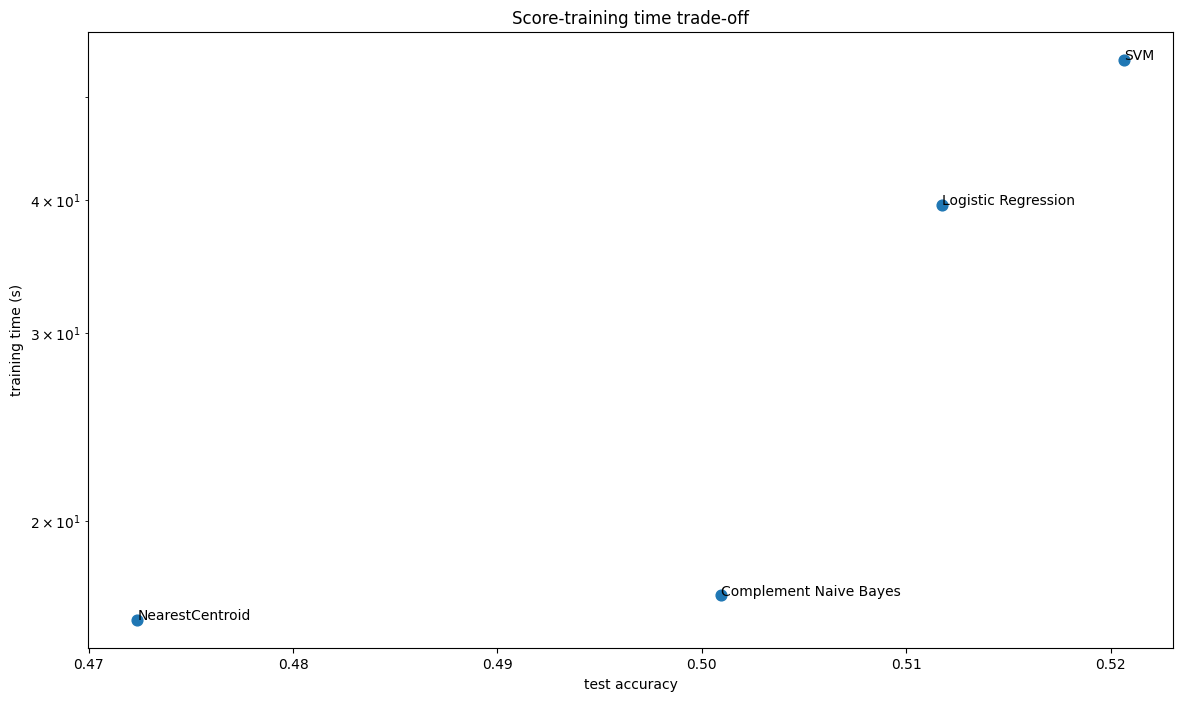

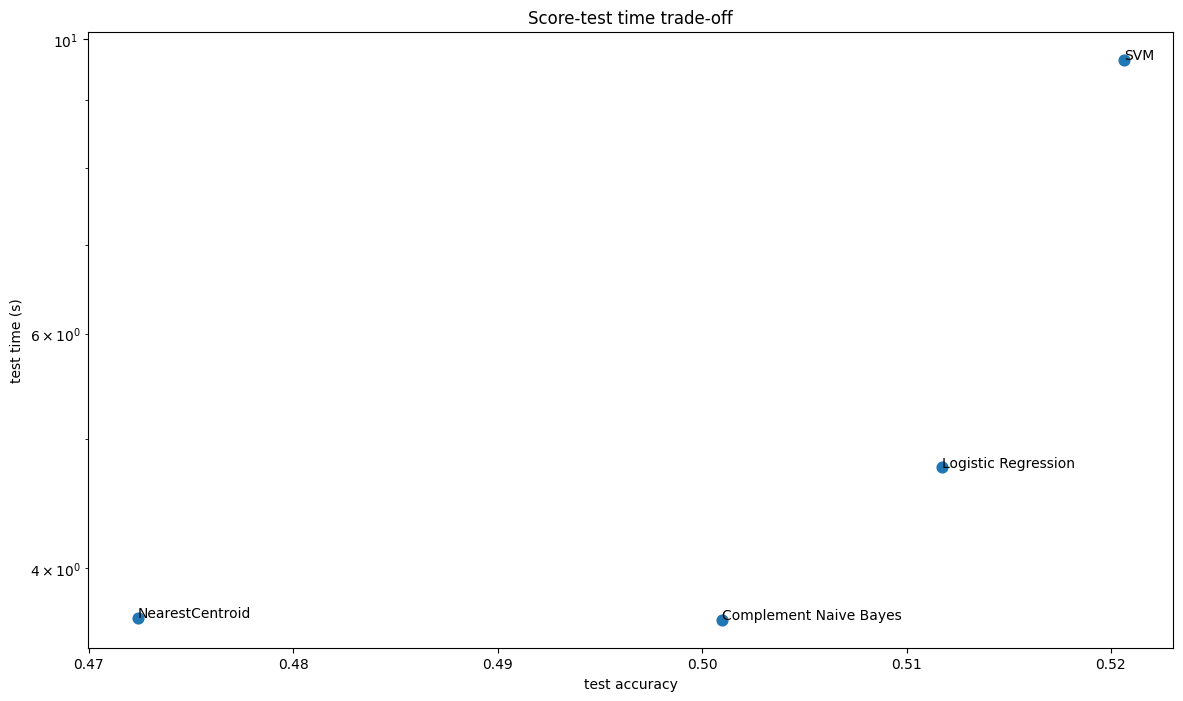

In [ ]:
# Para plottear los resultados:

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time)
test_time = np.array(test_time)

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
print()
fig, ax2 = plt.subplots(figsize=(14, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))

Clasificación de datos no etiquetados con el algoritmo de clasificacion escogido:

Los datos no etiquetados corresponden a aquellos que se encuentran en: *particion_prueba_estudiantes.csv*

In [ ]:
prueba_classified = pipeline_svm_optimal.predict(df_test['Review'])
df_test['Class'] = prueba_classified
df_test.to_csv('prueba_clasificados.csv', index=False)

## Video explicando el proyecto y los resultados

[Oprima aquí para ver el video](https://www.youtube.com/watch?v=dhtvFLPmxCg)

# Trabajo en equipo

| Integrante           | Rol                        | Tareas realizadas                                                                                     | Algoritmo                      | Horas |
|----------------------|----------------------------|-------------------------------------------------------------------------------------------------------|--------------------------------|-------|
| J. Andrés Jaramillo | Líder del proyecto y analítica | Entendimiento y preparación de los datos, implementación de Complement Naive Bayes y análisis de resultados para los 2 algoritmos. | Complement Naive Bayes (2 versiones) | 25    |
| Santiago Rappy       | Líder de datos             | Explicación de metodología en la analítica de textos, modelado de Nearest Centroid y análisis de sus resultados. | Nearest Centroid              | 20    |
| Nicole Murillo       | Líder de negocio           | Construcción del documento, entendimiento del negocio y enfoque analítico, implementación de SVM y Logistic Regression y análisis de los resultados. | Support Vector Machines (SVM) y Logistic Regression | 25    |


## Retos enfrentados en el proyecto y las formas planteadas para resolverlos

Durante el desarrollo del proyecto nos enfrentamos a varios retos, de los cuales destacamos los siguientes 2 como los más importantes/recurrentes: en primer lugar, la falta de conocimientos previos trabajando con modelos de procesamiento de lenguaje natural. Ninguno de los temas aprendidos hasta ahora en el curso nos enseñó cómo realizar algoritmos de procesamiento de texto, por lo cual consideramos este como el reto más grande e importante de todos, pues nos tomó varias horas familiarizarnos con los temas, con los procedimientos necesarios para preparar el texto y aprender el funcionamiento de los algoritmos más comunes para la resolución de este tipo de problemas. En segundo lugar, consideramos como el reto más recurrente, la organización de los tiempos para trabajar eficientemente en equipo, ya que no podíamos trabajar simultáneamente en el notebook y por lo tanto tuvimos que coordinarnos todos los días para realizar avances en nuestros respectivos modelos.

## ¿Cómo repartiríamos 100 puntos entre los integrantes del grupo?

Repartiríamos de forma equitativa los 100 puntos entre los 3 integrantes que conforman el grupo, de manera que, cada uno obtendría 33.33 puntos por su contribución en la primera etapa del proyecto 1.

## Puntos a mejorar para la siguiente entrega del proyecto


Para la próxima iteración del proyecto, vamos a dedicar un tiempo al inicio para organizar de la manera más eficiente posible la división del trabajo, de tal manera que no tengamos tiempo muerto debido a cuellos de botella en la utilización de alguno de los recursos compartidos (como el notebook grupal en este caso).


## Reuniones de grupo

| Tipo de reunión                 | Día               | Propósito                                                                                                                                                                                                                                                                                       |
|---------------------------------|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Reunión de lanzamiento y planeación | 24 de marzo 2024 | Definimos los roles y la forma de trabajo del grupo. Además, generamos una lluvia de ideas sobre la forma de resolver el proyecto. También investigamos un poco sobre analítica de textos.                                                                                                    |
| Reunión de ideación             | 24 de marzo 2024 | Justo después de generar la lluvia de ideas, empezamos a explorar los datos para definir una solución analítica acorde a estos, y definimos la organización y los roles que se benefician de nuestra solución.                                                                                   |
| Reuniones de seguimiento        | 1 y 4 de abril 2024  | Tuvimos dos breves reuniones de seguimiento para mirar los avances y resolver dudas/problemas que se fueron generando durante el desarrollo del proyecto y los modelos.                                                                                                                       |
| Reunión de finalización         | 6 de abril 2024   | Revisamos si teníamos todos los entregables, ajustamos detalles finales, consolidamos el trabajo final, y analizamos los puntos a mejorar en la siguiente etapa.                                                                                                                               |
